In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utils_auto 

# Configuration

In [5]:
trial_idx=1
paper='2004.04168'

# Code-generation prompts

In [5]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [7]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
`
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy relev

# LLM-Generated code

In [8]:
generated_code = utils_auto.code_generate(prompt,max_tokens=12800,budget_tokens=6400,)


#################### THINKING ####################

Let
Let me analyze the Hamiltonian equation step by step.

First, I'll identify the different parts of the Hamiltonian:

1. Kinetic term: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
2. Hartree term: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
3. Fock term: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

Where $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

Now, let's answer the questions:

### QUESTION 1: Dimension and Basis Order
Looking at the Hamiltonian, we have operators $c^\dagger_s(k)$ and $c_s(k)$ where $s$ seems to be some spin or flavor index. Since there are no other indices, D should just be the number of possible values for $s$.

The Hamiltonian doesn't explicitly

In [9]:
print(generated_code['thinking'])

Let me analyze the Hamiltonian equation step by step.

First, I'll identify the different parts of the Hamiltonian:

1. Kinetic term: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
2. Hartree term: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
3. Fock term: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

Where $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

Now, let's answer the questions:

### QUESTION 1: Dimension and Basis Order
Looking at the Hamiltonian, we have operators $c^\dagger_s(k)$ and $c_s(k)$ where $s$ seems to be some spin or flavor index. Since there are no other indices, D should just be the number of possible values for $s$.

The Hamiltonian doesn't explicitly say how many values $s$ can take, but in condensed matte

In [10]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: up, down

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle c_s^\dagger(k_1) c_s(k_1) \rangle": "diagonal elements of exp_val[s, s, k1]",
    r"\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle": "off-diagonal elements of exp_val[s, s', k1]"
}

TERMS:
- $E_s(k) c^\dagger_s(k) c_s(k)$ -> H[s, s, k], NI
- $\frac{1}{N} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ -> H[s', s', k2], I
- $-\frac{1}{N} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ -> H[s', s, k2], I

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a spin system on a triangular lattice.
    
    Args:
        N_shell (int): Number of "shells" in the k-space.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float, optional): Filling factor. Defaults to

In [11]:
code = utils_auto.extract_code(generated_code['text'])

In [12]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a spin system on a triangular lattice.
    
    Args:
        N_shell (int): Number of "shells" in the k-space.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float, optional): Filling factor. Defaults to 0.5.
    """
    def __init__(self, N_shell: int=10, parameters: dict={'t_up': 1.0, 't_down': 1.0, 'U_0': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # Spin up and spin down
        self.basis_order = {'0': 'spin'}
        # Order for each flavor:
        # 0: spin up, spin down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = 0
        self.a = parameters.get('a', 1.0)  # Lattice constant
        self.primitive_vectors = self.a * np.array([[1, 0], [0.5, np.sqrt(3)/2]])  # Define the primitive (Bravais) lattice vect

In [13]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_1.py


# Code evaluation

In [6]:
trial_idx=1

In [7]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [8]:
import importlib

In [9]:
module = importlib.import_module(code_path)

In [10]:
import HF

## Check k-space

In [11]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

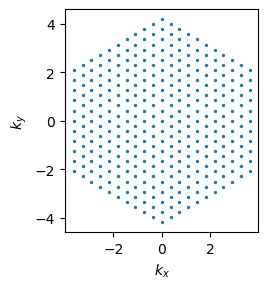

In [13]:
fig=utils_auto.plot_kspace(kspace=ham.k_space)

## Check energy dispersion for non-interacting term

In [25]:
h_nonint = ham.generate_non_interacting()

In [26]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

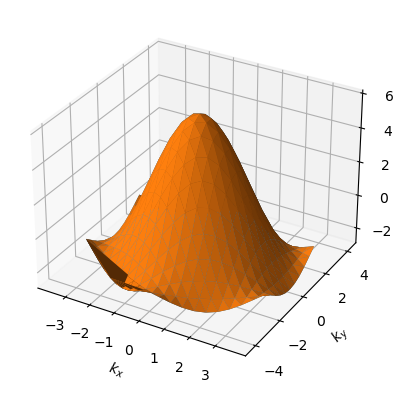

In [27]:
utils_auto.plot_2d_bandstructure(ham,en)

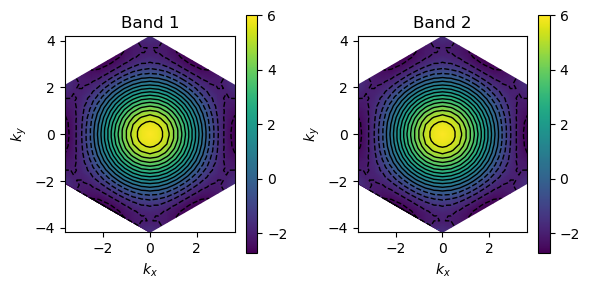

In [28]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

In [68]:
"""Interstingly, the quality of code is defpendent on the level of thinking, controlled by `budget_tokens`"""

'Interstingly, the quality of code is defpendent on the level of thinking, controlled by `budget_tokens`'

## Infinitesemial U limit

In [31]:
ham_int= module.HartreeFockHamiltonian(N_shell=10)
ham_int.U0=1e-5
ham_int.U1=0

In [32]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [33]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


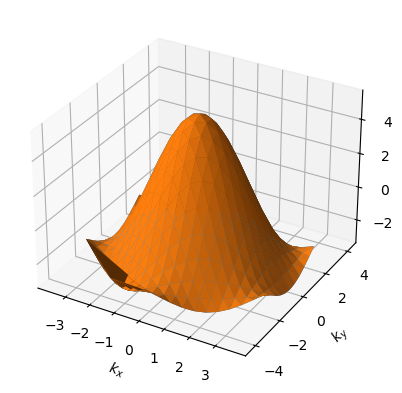

In [14]:
utils_auto.plot_2d_bandstructure(ham_int,en_int)

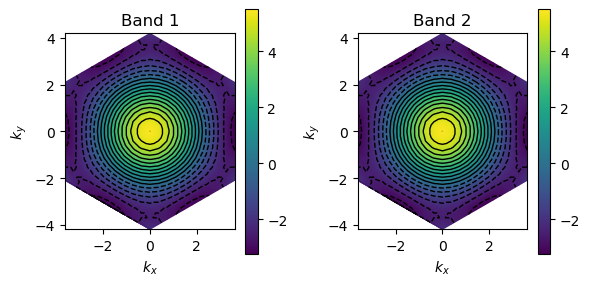

In [34]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Large U limit

In [44]:
ham_int= module.HartreeFockHamiltonian(N_shell=10)
ham_int.U_0=1e5
ham_int.U1=0

In [45]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [46]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


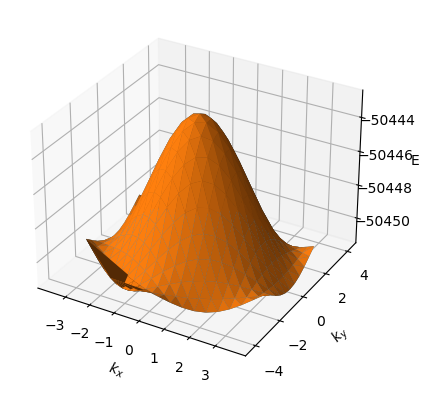

In [48]:
utils_auto.plot_2d_bandstructure(ham_int,en_int)

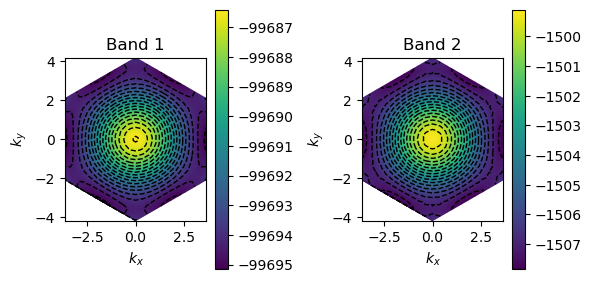

In [47]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [40]:
ham_int.U_0

100000.0

In [41]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 98178.58
U/T is 24548.43
mean_U is 24999.09


# Auto eval

In [50]:
import base64


## Task 1

In [23]:
result = utils_auto.vision_eval(
    fig=fig, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper='2004.04168')
    )


#################### THINKING ####################

Let
Let me analyze the image and evaluate it against the rubric.

The image shows a mesh of points in momentum space (k-space), specifically in the first Brillouin zone. The x-axis is labeled as k_x and the y-axis as k_y. The points form a hexagonal pattern.

According to the rubric, I need to check:
1. Whether this shows a momentum space mesh in the first Brillouin zone of the concerned problem.
2. The point group symmetry.

From the problem description, we're dealing with a triangular lattice, which has a hexagonal first Brillouin zone in k-space. This is because the Brillouin zone of a lattice is the Wigner-Seitz cell of the reciprocal lattice, and the reciprocal lattice of a triangular lattice is another triangular lattice rotated by 30 degrees, resulting in a hexagonal Brillouin zone.

Looking at the image, I can see:
- The mesh forms a hexagon in the k_x-k_y plane
- The points are evenly distributed
- The hexagon is centered at

In [24]:
utils_auto.extract_result_content(result['text'])

'correct'

## Task 2

In [29]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper='2004.04168')
    )


#################### THINKING ####################

Let's analyze
Let's analyze the image provided and check it against the rubric requirements.

The image shows two false color plots with contour lines, labeled "Band 1" and "Band 2". These appear to be showing the non-interacting band structure in the first Brillouin zone for two bands of a system. The plots are shown in momentum space (k-space) with kx and ky axes.

Let me go through the rubric point by point:

1. **Shape of the Brillouin zone boundary**:
   - I can see that the boundary of the plotted region has a hexagonal shape, which is indeed the expected shape for the first Brillouin zone of a triangular lattice. The hexagonal shape is clearly visible in both plots.
   - This is correct.

2. **Symmetry of the energy distribution**:

   2.1 **Highest energy regions (yellow)**:
   - In both Band 1 and Band 2, the highest energy (yellow) appears at the center of the Brillouin zone, at the point (0,0), also known as the Γ point.
 

In [30]:
utils_auto.extract_result_content(result2['text'])

'correct'

## Task 3

In [35]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper='2004.04168')
    )


#################### THINKING ####################

Let me
Let me analyze the image of the band structure plots and evaluate them according to the given rubric.

The image shows two false color plots labeled "Band 1" and "Band 2", which appear to represent the interacting-renormalized band structure in the first Brillouin zone after a self-consistent Hartree-Fock calculation with infinitesimal interaction.

Let's go through the rubric points one by one:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

In the image, I can see that the Brillouin zone has a hexagonal shape, which is indeed the expected shape for a triangular lattice in reciprocal space. This is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (yellow) appear at the center of both Band 1 and Band 2 plots, around (kx=0, k

In [36]:
utils_auto.extract_result_content(result3['text'])

'correct'

## Task 4

In [50]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper='2004.04168',U_int=1e5)
    )


#################### THINKING ####################

I
I need to analyze the provided image showing band structure plots after a self-consistent Hartree-Fock calculation for a triangular lattice. Let me go through the rubric points systematically.

1. Identifying the shape of the Brillouin zone boundary:
The image shows two hexagonal-shaped plots labeled "Band 1" and "Band 2". The boundary of each plot is indeed hexagonal, which matches what's expected for a triangular lattice. The first Brillouin zone of a triangular lattice should be a regular hexagon, which is what we see here.

2. Examining the symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
In both Band 1 and Band 2, the highest energy regions (yellow) appear to be concentrated at the center of the Brillouin zone (around k_x = 0, k_y = 0).

2.2 Pattern of energy variation:
The energy varies radially from the center (highest/yellow) to the edges (lowest/purple). The contour lines form concentric patterns 

In [51]:
utils_auto.extract_result_content(result4['text'])

'correct'